In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt


# File Loading

In [2]:
f = uproot.open("../data_files/del1g_small_test.root")
f.items()

[('nuselection;1', <ReadOnlyDirectory '/nuselection' at 0x0001170d9360>),
 ('nuselection/NeutrinoSelectionFilter;1',
  <TTree 'NeutrinoSelectionFilter' (921 branches) at 0x0001170d95d0>),
 ('nuselection/SubRun;1', <TTree 'SubRun' (3 branches) at 0x0001170da140>),
 ('nuselection/H_time;1', <TH1F (version 3) at 0x00012745a050>),
 ('nuselection/H_maxH;1', <TH1F (version 3) at 0x00012745b130>),
 ('nuselection/H_t0_Beam;1', <TH1F (version 3) at 0x00012745a080>),
 ('nuselection/H_TimeVsPh;1', <TH2F (version 4) at 0x000127471390>),
 ('nuselection/H_Truthtime;1', <TH1F (version 3) at 0x000127472530>),
 ('nuselection/H_SimTime;1', <TH1F (version 3) at 0x000127473640>),
 ('nuselection/H_ns_time;1', <TH1F (version 3) at 0x0001274725f0>),
 ('shrreco3d;1', <ReadOnlyDirectory '/shrreco3d' at 0x000127473700>),
 ('shrreco3d/_energy_tree;1',
  <TTree '_energy_tree' (6 branches) at 0x000127488940>),
 ('shrreco3d/_dedx_tree;1',
  <TTree '_dedx_tree' (24 branches) at 0x0001274737f0>),
 ('shrreco3d/_rcshr_

# Reco Neutrino Energy Comparisons

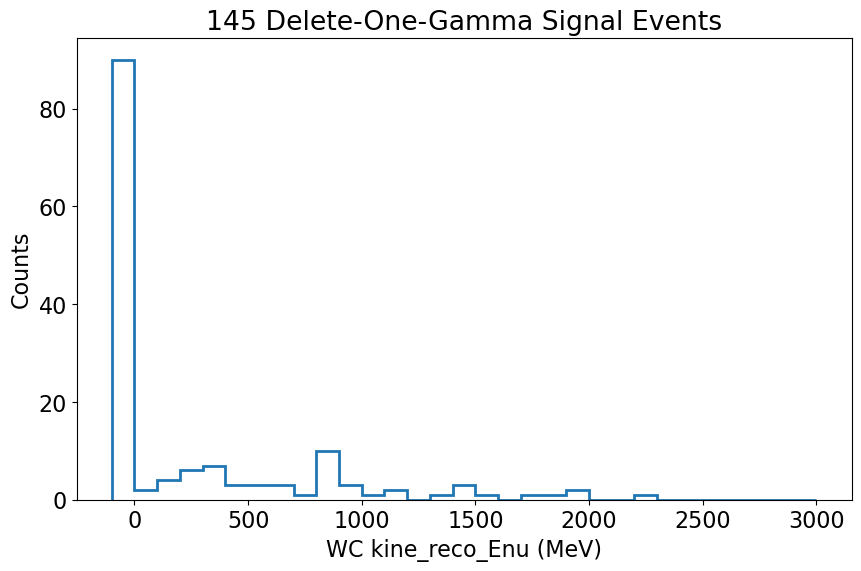

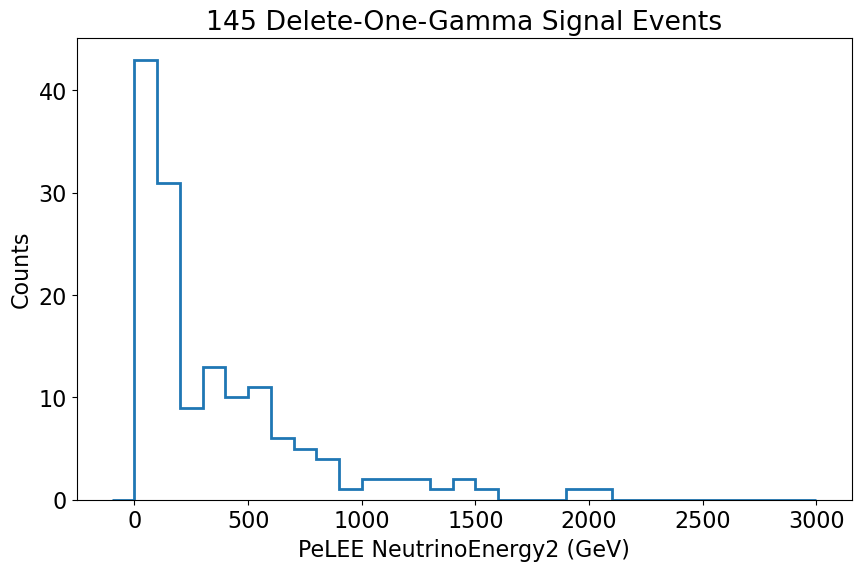

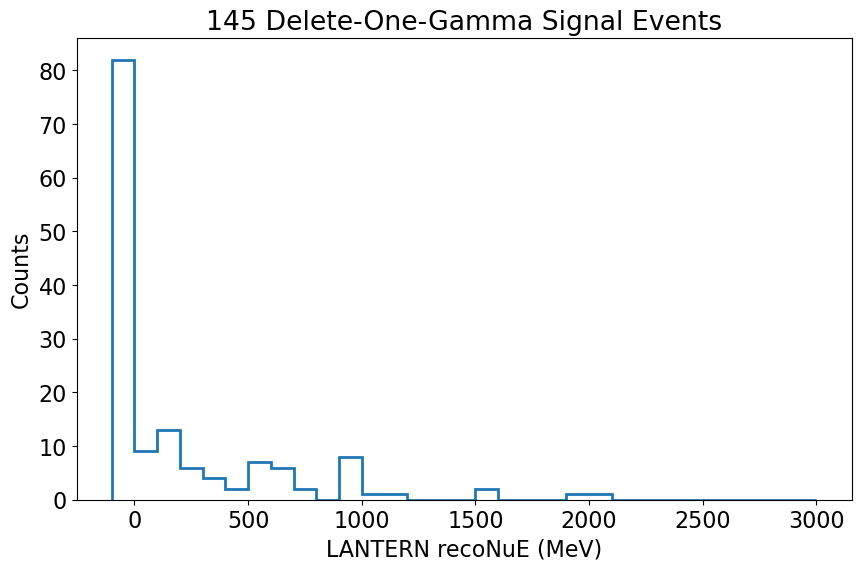

In [3]:
plt.rcParams.update({'font.size': 16})

bins = np.linspace(-100, 3000, 32)
wc_kine_reco_Enu = f["wcpselection"]["T_KINEvars"].arrays("kine_reco_Enu", library="np")["kine_reco_Enu"]
num_events = len(wc_kine_reco_Enu)
plt.figure(figsize=(10, 6))
plt.hist(wc_kine_reco_Enu, bins=bins, histtype="step", lw=2)
plt.xlabel("WC kine_reco_Enu (MeV)")
plt.ylabel("Counts")
plt.title(f"{num_events} Delete-One-Gamma Signal Events")
plt.show()

bins = np.linspace(-100, 3000, 32)
pelee_NeutrinoEnergy2 = f["nuselection"]["NeutrinoSelectionFilter"].arrays("NeutrinoEnergy2", library="np")["NeutrinoEnergy2"]
plt.figure(figsize=(10, 6))
plt.hist(pelee_NeutrinoEnergy2, bins=bins, histtype="step", lw=2)
plt.xlabel("PeLEE NeutrinoEnergy2 (GeV)")
plt.ylabel("Counts")
plt.title(f"{num_events} Delete-One-Gamma Signal Events")
plt.show()


lantern_recoNuE = f["lantern"]["EventTree"].arrays("recoNuE", library="np")["recoNuE"]
bins = np.linspace(-100, 3000, 32)
plt.figure(figsize=(10, 6))
plt.hist(lantern_recoNuE, bins=bins, histtype="step", lw=2)
plt.xlabel("LANTERN recoNuE (MeV)")
plt.ylabel("Counts")
plt.title(f"{num_events} Delete-One-Gamma Signal Events")
plt.show()



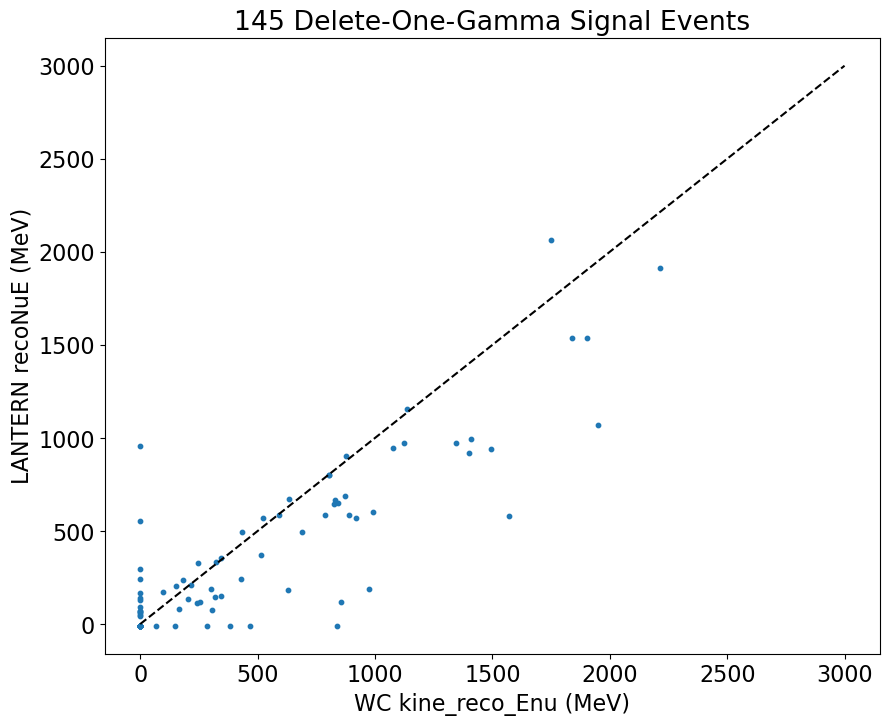

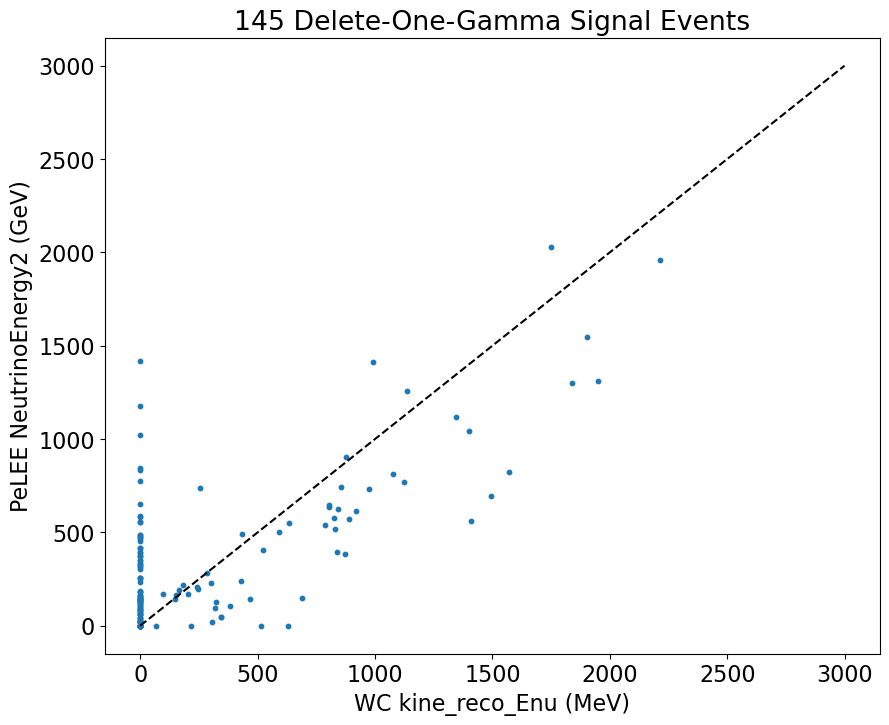

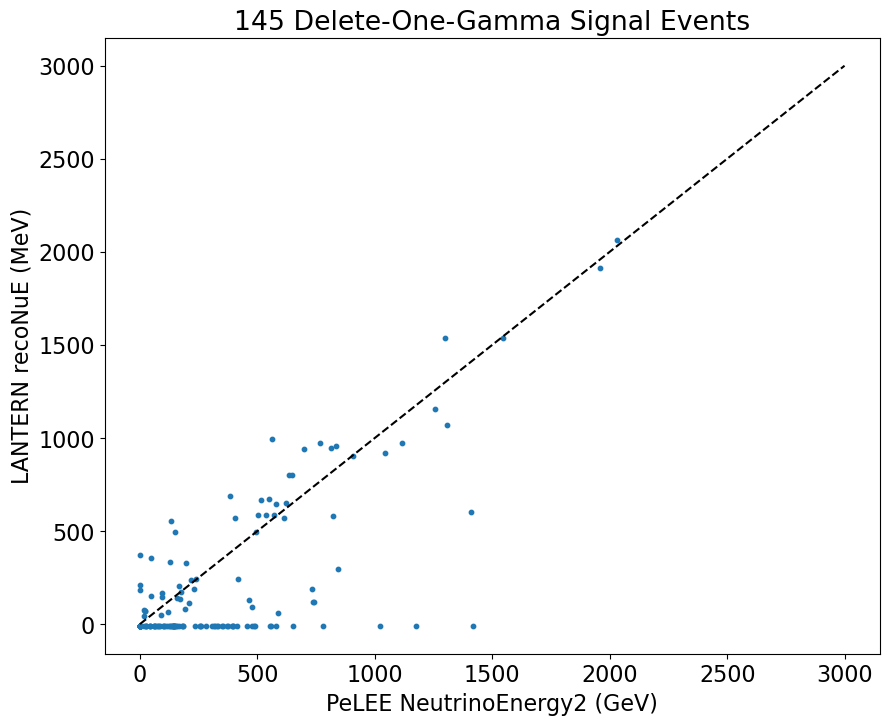

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(wc_kine_reco_Enu, lantern_recoNuE, s=10)
plt.plot([0, 3000], [0, 3000], "k--")
plt.xlabel("WC kine_reco_Enu (MeV)")
plt.ylabel("LANTERN recoNuE (MeV)")
plt.title(f"{num_events} Delete-One-Gamma Signal Events")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(wc_kine_reco_Enu, pelee_NeutrinoEnergy2, s=10)
plt.plot([0, 3000], [0, 3000], "k--")
plt.xlabel("WC kine_reco_Enu (MeV)")
plt.ylabel("PeLEE NeutrinoEnergy2 (GeV)")
plt.title(f"{num_events} Delete-One-Gamma Signal Events")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pelee_NeutrinoEnergy2, lantern_recoNuE, s=10)
plt.plot([0, 3000], [0, 3000], "k--")
plt.xlabel("PeLEE NeutrinoEnergy2 (GeV)")
plt.ylabel("LANTERN recoNuE (MeV)")
plt.title(f"{num_events} Delete-One-Gamma Signal Events")
plt.show()


# Spacepoint Event Displays

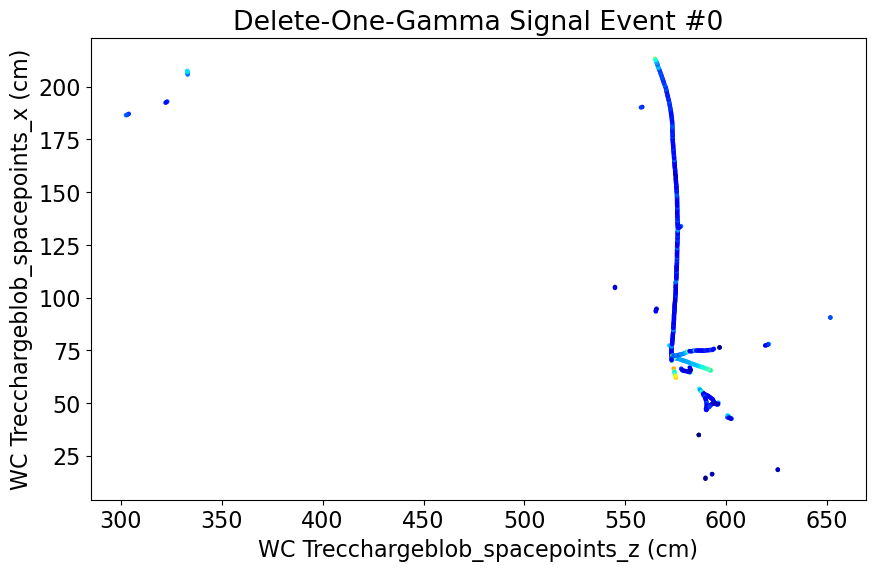

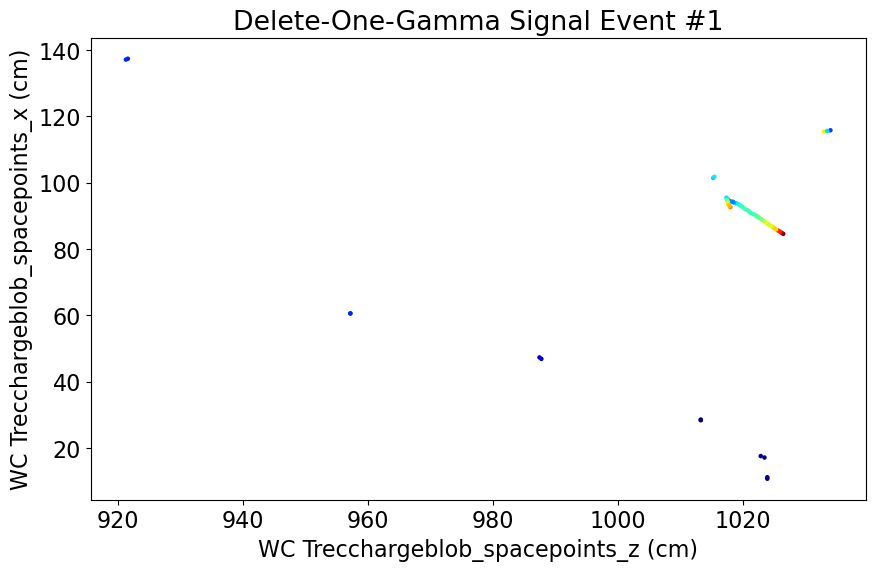

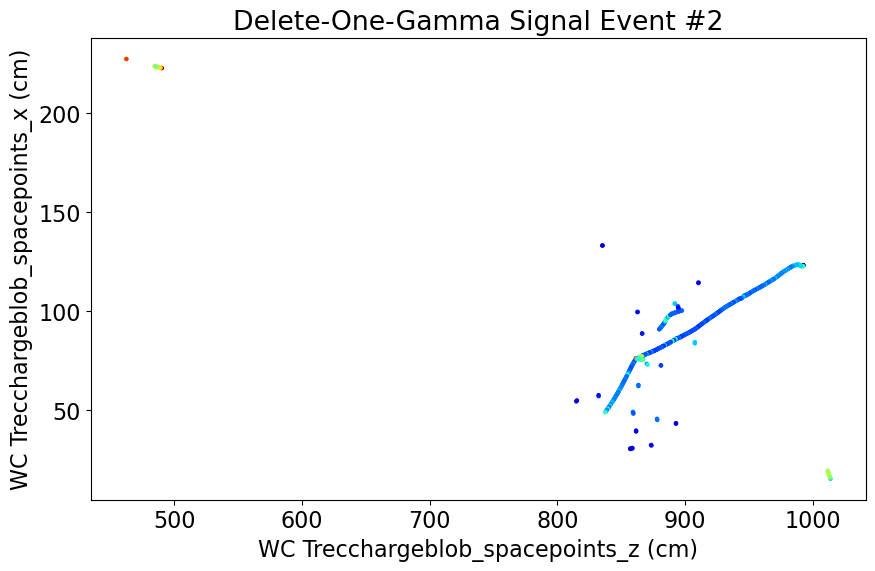

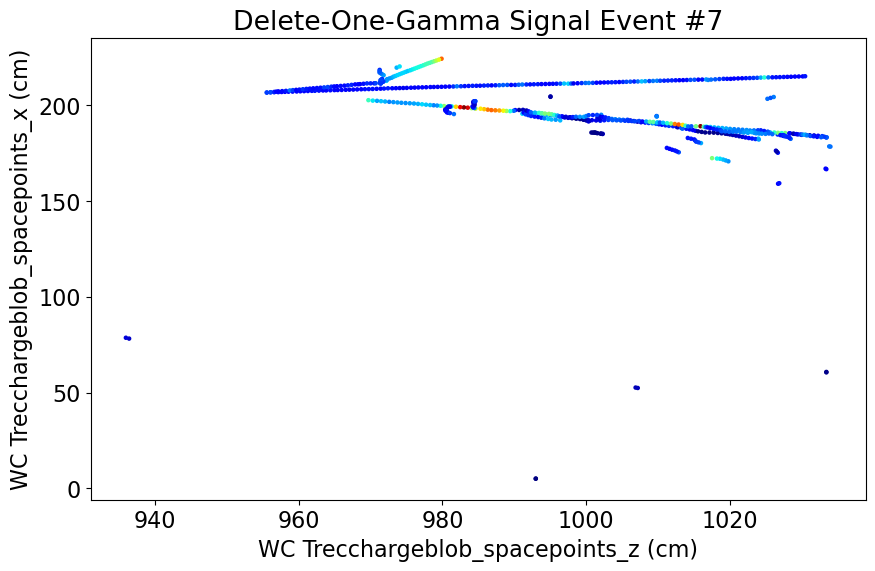

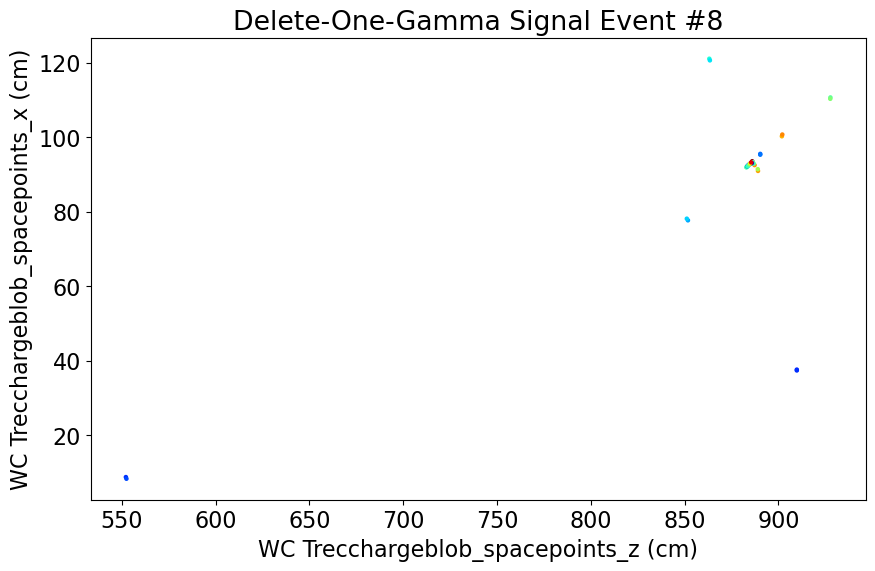

In [12]:
wc_reco_spacepoint_xs = f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_x", library="np")["Trecchargeblob_spacepoints_x"]
wc_reco_spacepoint_ys = f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_y", library="np")["Trecchargeblob_spacepoints_y"]
wc_reco_spacepoint_zs = f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_z", library="np")["Trecchargeblob_spacepoints_z"]
wc_reco_spacepoint_qs = f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_q", library="np")["Trecchargeblob_spacepoints_q"]

for event_idx in range(10):

    num_spacepoints = len(wc_reco_spacepoint_xs[event_idx])

    if num_spacepoints > 0:

        plt.figure(figsize=(10, 6))
        plt.scatter(wc_reco_spacepoint_zs[event_idx], wc_reco_spacepoint_xs[event_idx], c=wc_reco_spacepoint_qs[event_idx], cmap="jet", s=5)
        plt.xlabel("WC Trecchargeblob_spacepoints_z (cm)")
        plt.ylabel("WC Trecchargeblob_spacepoints_x (cm)")
        plt.title(f"Delete-One-Gamma Signal Event #{event_idx}")
        plt.show()
